# Bagging introduction

- Bagging (Bootstrap Aggregating) is an ensemble method in machine learning where multiple models are trained independently on random subsets of the training data (created with replacement),and their predictions are combined typically by averaging for regression or voting for classification. Bagging helps reduce variance and overfitting, making predictions more stable and robust.

In [69]:
import numpy as np
import pandas as pd

In [70]:
from sklearn.datasets import load_iris
iris = load_iris()

In [71]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

In [72]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [73]:
df = df[df['target'] != 0][['sepal width (cm)','petal length (cm)', 'target']]

In [74]:
df.head()

,sepal width (cm),petal length (cm),target
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

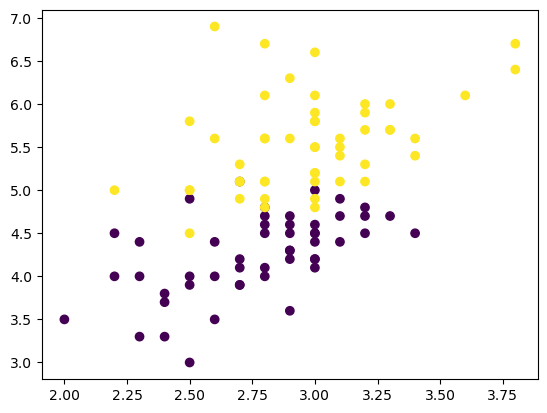

In [76]:
plt.scatter(df['sepal width (cm)'], df['petal length (cm)'], c = df['target'])

### Taking only 10 rows

In [77]:
df = df.sample(100)
df_train = df.iloc[:60,:].sample(10)
df_val = df.iloc[60:80,:].sample(5)
df_test = df.iloc[80:,:].sample(5)

In [78]:
df_train.head()

,sepal width (cm),petal length (cm),target
112,3.0,5.5,2
141,3.1,5.1,2
123,2.7,4.9,2
146,2.5,5.0,2
56,3.3,4.7,1


In [79]:
X_test = df_val.iloc[:,0:2].values
y_test = df_val.iloc[:,-1].values

### Case-1 (Bagging)

In [80]:
# data for tree 1

df_bag = df_train.sample(8, replace=True)
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]
df_bag

,sepal width (cm),petal length (cm),target
141,3.1,5.1,2
91,3.0,4.6,1
56,3.3,4.7,1
56,3.3,4.7,1
141,3.1,5.1,2
146,2.5,5.0,2
141,3.1,5.1,2
56,3.3,4.7,1


In [81]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [82]:
df_bag1 = DecisionTreeClassifier()

In [83]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf , legend=2)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))

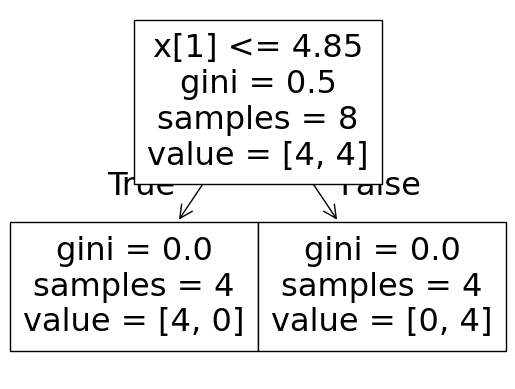

1.0


C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


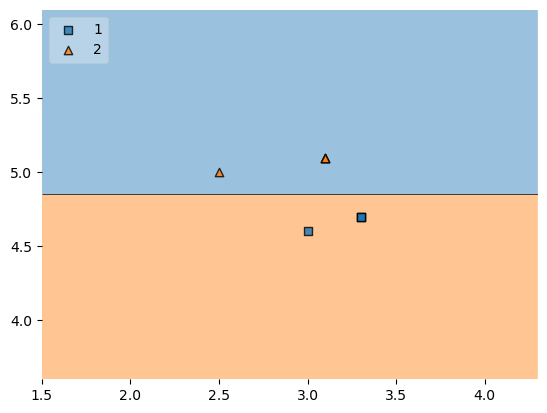

In [84]:
evaluate(df_bag1,X,y)

In [85]:
# data for tree 2
df_bag = df_train.sample(8, replace =True)
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,sepal width (cm),petal length (cm),target
91,3.0,4.6,1
149,3.0,5.1,2
70,3.2,4.8,1
118,2.6,6.9,2
123,2.7,4.9,2
149,3.0,5.1,2
100,3.3,6.0,2
123,2.7,4.9,2


In [86]:
df_bag2 = DecisionTreeClassifier()

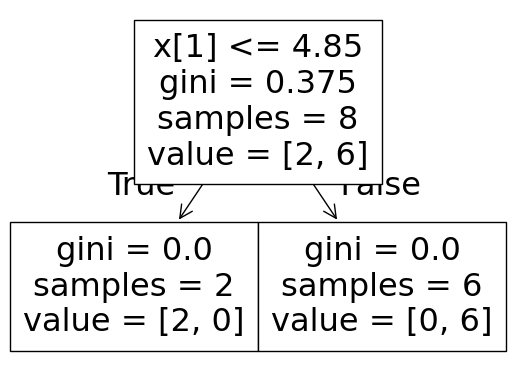

1.0


C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


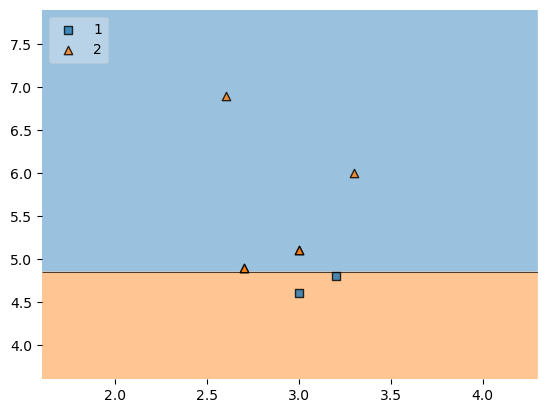

In [87]:
evaluate(dt_bag2, X,y)

In [88]:
# data for tree 3
df_bag = df_train.sample(8, replace =True)
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,sepal width (cm),petal length (cm),target
146,2.5,5.0,2
56,3.3,4.7,1
112,3.0,5.5,2
141,3.1,5.1,2
146,2.5,5.0,2
149,3.0,5.1,2
123,2.7,4.9,2
149,3.0,5.1,2


In [89]:
df_bag3 = DecisionTreeClassifier()

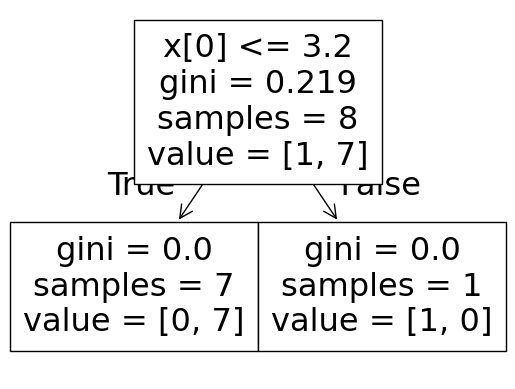

0.2


C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


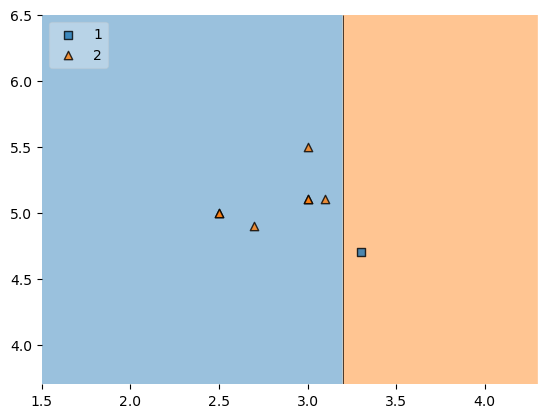

In [90]:
evaluate(df_bag3,X,y)

### Prediction

In [91]:
df_test

,sepal width (cm),petal length (cm),target
62,2.2,4.0,1
52,3.1,4.9,1
124,3.3,5.7,2
108,2.5,5.8,2
73,2.8,4.7,1


In [93]:
df_bag1.fit(X, y)
df_bag2.fit(X, y)
df_bag3.fit(X, y)

DecisionTreeClassifier()

In [95]:
print('Prediction 1', df_bag1.predict(np.array([2.2,4.0]).reshape(1,2)))
print('Prediction 2', df_bag2.predict(np.array([2.2,4.0]).reshape(1,2)))
print('Prediction 3', df_bag3.predict(np.array([2.2,4.0]).reshape(1,2)))

Prediction 1 [1]
Prediction 2 [2]
Prediction 3 [2]


C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


### Pasting

In [96]:
df_train

,sepal width (cm),petal length (cm),target
112,3.0,5.5,2
141,3.1,5.1,2
123,2.7,4.9,2
146,2.5,5.0,2
56,3.3,4.7,1
118,2.6,6.9,2
70,3.2,4.8,1
100,3.3,6.0,2
149,3.0,5.1,2
91,3.0,4.6,1


In [98]:
df_train.sample(8)

,sepal width (cm),petal length (cm),target
112,3.0,5.5,2
141,3.1,5.1,2
56,3.3,4.7,1
70,3.2,4.8,1
123,2.7,4.9,2
100,3.3,6.0,2
146,2.5,5.0,2
91,3.0,4.6,1


### Random Subspaces

In [102]:
df1 = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df1['target'] = iris.target

In [103]:
df1

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [104]:
df1.sample(2, replace =True, axis=1)

,target,sepal width (cm)
0,0,3.5
1,0,3.0
2,0,3.2
3,0,3.1
4,0,3.6
...,...,...
145,2,3.0
146,2,2.5
147,2,3.0
148,2,3.4


### Random Patches

In [105]:
df1

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [108]:
df1.sample(8,replace=True).sample(2, replace=True, axis=1)

,sepal length (cm),sepal width (cm)
83,6.0,2.7
112,6.8,3.0
144,6.7,3.3
115,6.4,3.2
137,6.4,3.1
142,5.8,2.7
91,6.1,3.0
134,6.1,2.6
